## Descriptive statistics

Lets analyze Türkiye's monthly and annual inflation data published by Central Bank (TCMB).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../data/enflasyon.csv',delimiter=';')

data.head()

,Tarih,Tufe_yil,Tufe_ay
0,Sub.22,54.44,4.81
1,Oca.22,48.69,11.10
2,Ara.21,36.08,13.58
3,Kas.21,21.31,3.51
4,Eki.21,19.89,2.39


Lets check mean and median values of annual inflation for Türkiye.

In [20]:
# mean and median values for annual inflation

# compute manually and compare it with pandas library results
ann_inf = data['Tufe_yil']

N = ann_inf.shape[0]
M = int(0.5*N)
pd_mean = ann_inf.mean()
mn_mean = sum(ann_inf)/N

print(f"Computed mean: {mn_mean}  Pandas mean: {pd_mean}")


pd_median = ann_inf.median()

ann_inf_ordered = ann_inf.sort_values(ascending=True)

if N%2 == 1:
    mn_median = ann_inf_ordered.iloc[M+1]
else:
    mn_median = 0.5*(ann_inf_ordered.iloc[M-1]+ann_inf_ordered.iloc[M])

print(f"Computed median: {mn_median}  Pandas median: {pd_median}")

Computed mean: 10.609805825242717  Pandas mean: 10.609805825242718
Computed median: 9.15  Pandas median: 9.15


Lets compute standard deviation of annual inflation.

In [31]:
# standard deviation values for annual inflation

# compute manually and compare it with pandas library results
ann_inf = data['Tufe_yil']

N = ann_inf.shape[0]
pd_std_dev = ann_inf.std(ddof=1)
sse = (ann_inf - ann_inf.mean())**2
mn_std_dev = np.sqrt(sse.sum()/(N-1))


print(f"Computed std dev: {mn_std_dev}  Pandas std dev: {pd_std_dev}")

Computed std dev: 5.889890467420409  Pandas std dev: 5.889890467420409


Lets compute range, quartiles, IQR

In [51]:
ann_inf = data['Tufe_yil']
N = ann_inf.shape[0]

# range 
range = ann_inf.max() - ann_inf.min()
print(f"range: {range}")


q1 = ann_inf.sort_values(ascending=True).iloc[int(N/4)]
q3 = ann_inf.sort_values(ascending=True).iloc[int(3*N/4)]
iqr = q3-q1

print(f"q1: {q1}  q3: {q3}, iqr: {q3-q1}")

# its better to use linear interpolation
# nearest point interpolation is used for simplicity
pd_q1 = ann_inf.quantile(0.25, interpolation='nearest')
pd_q3 = ann_inf.quantile(0.75, interpolation='nearest')

print(f"q1: {pd_q1}  q3: {pd_q3}, iqr: {pd_q3-pd_q1}")

range: 50.449999999999996
q1: 7.71  q3: 11.29, iqr: 3.579999999999999
q1: 7.71  q3: 11.29, iqr: 3.579999999999999


In [49]:
ann_inf.describe()

count    206.000000
mean      10.609806
std        5.889890
min        3.990000
25%        7.712500
50%        9.150000
75%       11.267500
max       54.440000
Name: Tufe_yil, dtype: float64

Lets check for outliers

In [71]:
ann_inf = data['Tufe_yil']
N = ann_inf.shape[0]

L = q1-1.5*iqr 
H = q3+1.5*iqr 

print(f"Low: {L} High: {H}")
#print(ann_inf)
outliers = ann_inf[ ann_inf < L]
print(outliers)

outliers = ann_inf[ ann_inf > H]
print(outliers)


Low: 2.3400000000000007 High: 16.659999999999997
Series([], Name: Tufe_yil, dtype: float64)
0     54.44
1     48.69
2     36.08
3     21.31
4     19.89
5     19.58
6     19.25
7     18.95
8     17.53
10    17.14
33    18.71
34    19.50
35    19.71
36    19.67
37    20.35
38    20.30
39    21.62
40    25.24
41    24.52
42    17.90
Name: Tufe_yil, dtype: float64


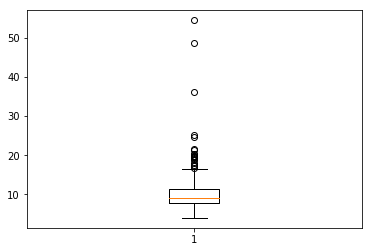

In [72]:
plt.boxplot(ann_inf);
